In [1]:
import pandas as pd
import glob
import gmaps
import gmaps.datasets
from datetime import datetime
from datetime import timedelta
from dateutil.parser import parse

In [157]:
path = "Data/Privamov"
allFiles = glob.glob(path + "/privamov*")
frame = pd.DataFrame()
list_= []

for file_ in allFiles:
    df = pd.read_csv(file_,sep="\t", header=None,  names = ["Id", "DateTime", "Longitude", "Latitude"])
    list_.append(df)
frame = pd.concat(list_)

In [158]:
df1 = frame[["Latitude", "Longitude"]][frame["Id"] == 1]
df2 = frame[["Latitude", "Longitude"]][frame["Id"] == 2]
df11 = frame[["Latitude", "Longitude"]][frame["Id"] == 11]

In [160]:
lat1 = df1['Latitude'].values
long1 = df1['Longitude'].values

lat2 = df2['Latitude'].values
long2 = df2['Longitude'].values

lat11 = df11['Latitude'].values
long11 = df11['Longitude'].values

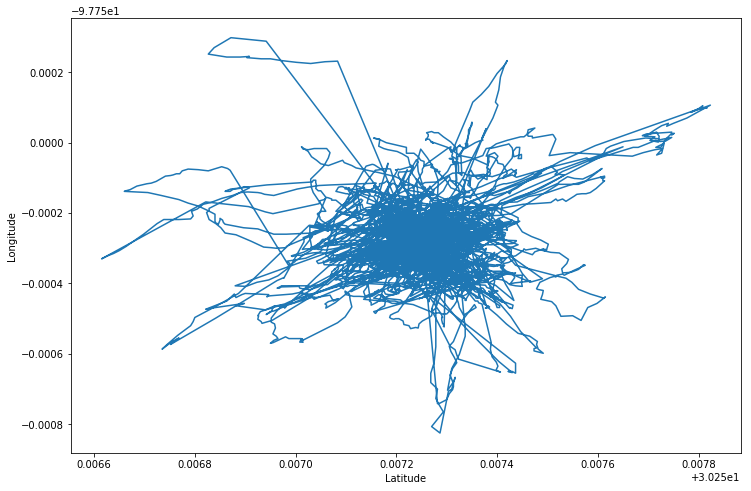

In [161]:
plt.figure(figsize=(12,8))
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.plot(lat1, long1)
plt.show()

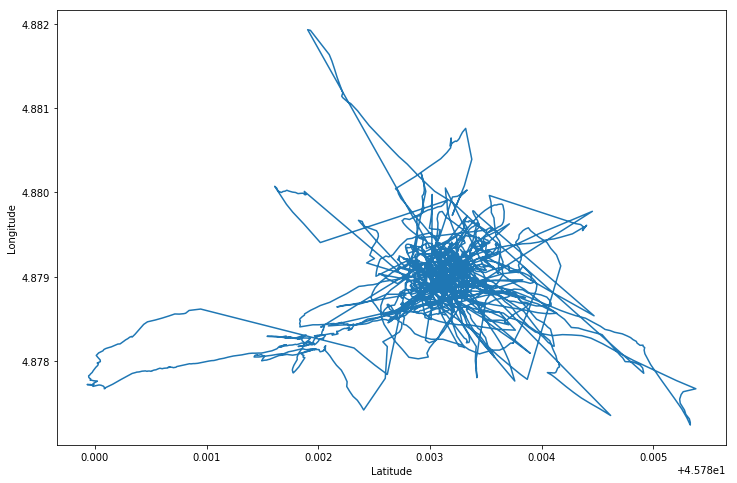

In [162]:
plt.figure(figsize=(12,8))
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.plot(lat2, long2)
plt.show()

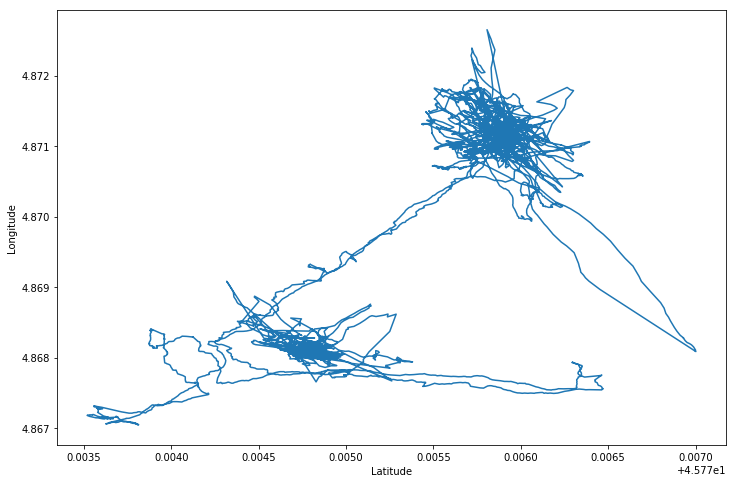

In [163]:
plt.figure(figsize=(12,8))
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.plot(lat11, long11)
plt.show()

In [167]:
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np

def fct(x):
    df2_dyn = df2.iloc[0:x]
    lat2_dyn = df2_dyn['Latitude'].values
    long2_dyn = df2_dyn['Longitude'].values
    plt.figure(figsize=(12,8))
    plt.xlabel('Latitude')
    plt.ylabel('Longitude')
    plt.plot(lat2_dyn, long2_dyn)
    #plt.xlim(45.7735, 45.7770)
    #plt.ylim(4.867,4.873)
    plt.show()
    
interactive_plot = interactive(fct, x=(1, len(df2)))
output = interactive_plot.children[-1]
interactive_plot

interactive(children=(IntSlider(value=9043, description='x', max=18086, min=1), Output()), _dom_classes=('widget-interact',))

In [168]:
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np

def fct(x):
    df11_dyn = df11.iloc[0:x]
    lat11_dyn = df11_dyn['Latitude'].values
    long11_dyn = df11_dyn['Longitude'].values
    plt.figure(figsize=(12,8))
    plt.xlabel('Latitude')
    plt.ylabel('Longitude')
    plt.plot(lat11_dyn, long11_dyn)
    plt.xlim(45.7735, 45.7770)
    plt.ylim(4.867,4.873)
    plt.show()
    
interactive_plot = interactive(fct, x=(1, len(df11)))
output = interactive_plot.children[-1]
interactive_plot

interactive(children=(IntSlider(value=33647, description='x', max=67294, min=1), Output()), _dom_classes=('widget-interact',))

In [181]:
df = pd.read_csv("Data/Privamov/id11.txt",sep="\t", header=None,  names = ["Id", "DateTime", "Latitude", "Longitude"])
coord11 = df[["Latitude", "Longitude"]]

In [182]:
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np

def fct(x):
    coord11_dyn = coord11.iloc[0:x]
    lat_coord11_dyn = coord11_dyn['Latitude'].values
    long_coord11_dyn = coord11_dyn['Longitude'].values
    plt.figure(figsize=(12,8))
    #plt.xlim(0.0035, 0.0070)
    #plt.ylim(4.867,4.873)
    plt.xlabel('Latitude')
    plt.ylabel('Longitude')
    plt.plot(lat_coord11_dyn, long_coord11_dyn)
    plt.xlim(45.7735, 45.7770)
    plt.ylim(4.867,4.873)
    plt.show()
    
interactive_plot = interactive(fct, x=(1, len(coord11)))
output = interactive_plot.children[-1]
interactive_plot

interactive(children=(IntSlider(value=148, description='x', max=296, min=1), Output()), _dom_classes=('widget-interact',))